In [1]:
# idea:

# training should create a json file with the following structure, a list of dict with the following keys:
# - loss
# - accuracy + other metrics
# - degrad loss
# - # samples seen
# eg. [{loss: 0.1, accuracy: 0.9, degrad_loss: 0.2, samples_seen: 1000}, {loss: 0.2, accuracy: 0.8, degrad_loss: 0.3, samples_seen: 2000}]


# Then we create a final test json with following keys:
# - one key per metric

# Ideally, create a folder regrouping all the relevent traning logs

# color code: grey and yellow (grey for base, yellow for modified), maybe ask again in case

# Test everything locally first

In [2]:
import json
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import jsonlines

# 0) Loading data

In [3]:
#roberta_training_base = "./saved_training_logs/output_freeze_model/roberta"
roberta_training_base = "./outputs_full_finetuning/roberta/"
training_logs = roberta_training_base + "25_03_1216/training_logs.json"

In [4]:
training_logs_data = []
for line in jsonlines.open(training_logs):
    training_logs_data.append(line)

# transform to pandas dataframe
df = pd.DataFrame(training_logs_data)
df.head(100)

,samples,accuracy,std,lower_bound,upper_bound,loss,degrad_loss
0,498,0.92094,0.027697,0.87,0.97,NaN,NaN
1,998,1.00000,0.000000,1.00,1.00,NaN,NaN
2,198,NaN,NaN,NaN,NaN,0.687355,NaN
3,398,NaN,NaN,NaN,NaN,0.561507,NaN
4,598,NaN,NaN,NaN,NaN,0.193374,NaN
5,798,NaN,NaN,NaN,NaN,0.081659,NaN
6,998,NaN,NaN,NaN,NaN,0.089759,NaN
7,0,NaN,0.111591,NaN,NaN,NaN,5.805908
8,198,NaN,0.032513,NaN,NaN,NaN,5.909301
9,398,NaN,0.158012,NaN,NaN,NaN,6.698925


In [5]:
# separate the data for the 3 different plots
# 1) data with accuracy != nan is eval_acc data
# 2) data with degrad_loss != nan is degrad_loss data
# 3) data with loss != nan is training loss data

# 1) eval_acc data
eval_acc_df = df[df["accuracy"].notna()]
eval_acc_df = eval_acc_df[["accuracy", "samples", "std", "lower_bound", "upper_bound"]]
display(eval_acc_df)

# 2) degrad_loss data
degrad_loss_df = df[df["degrad_loss"].notna()]
degrad_loss_df = degrad_loss_df[["degrad_loss", "samples", "std"]]
display(degrad_loss_df)

# 3) training loss data
training_loss_df = df[df["loss"].notna()]
training_loss_df = training_loss_df[["loss", "samples"]]
display(training_loss_df)

,accuracy,samples,std,lower_bound,upper_bound
0,0.92094,498,0.027697,0.87,0.97
1,1.00000,998,0.000000,1.00,1.00


,degrad_loss,samples,std
7,5.805908,0,0.111591
8,5.909301,198,0.032513
9,6.698925,398,0.158012
10,8.137027,598,0.082587
11,7.138439,798,0.121074
12,7.578018,998,0.176133


,loss,samples
2,0.687355,198
3,0.561507,398
4,0.193374,598
5,0.081659,798
6,0.089759,998


# 1) Eval acc loss plot

Text(0, 0.5, 'Evaluation accuracy')

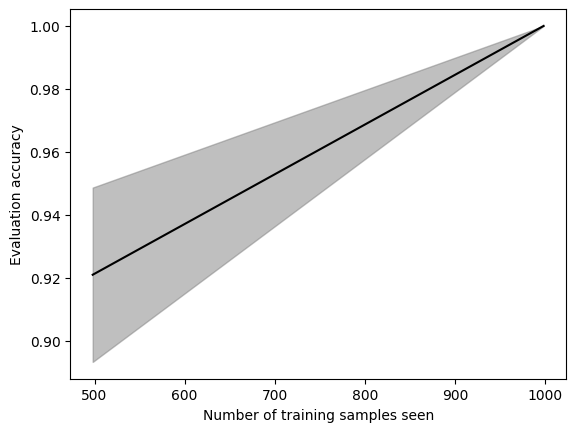

In [13]:
plt.fill_between(eval_acc_df["samples"], eval_acc_df["accuracy"] - eval_acc_df["std"],
                  eval_acc_df["accuracy"] + eval_acc_df["std"], alpha = 0.5, color = 'gray')
plt.plot(eval_acc_df["samples"], eval_acc_df["accuracy"], color = 'black')
# 
plt.xlabel('Number of training samples seen')
plt.ylabel('Evaluation accuracy')

# 2) Degradation loss plot

Text(0, 0.5, 'Degradation loss')

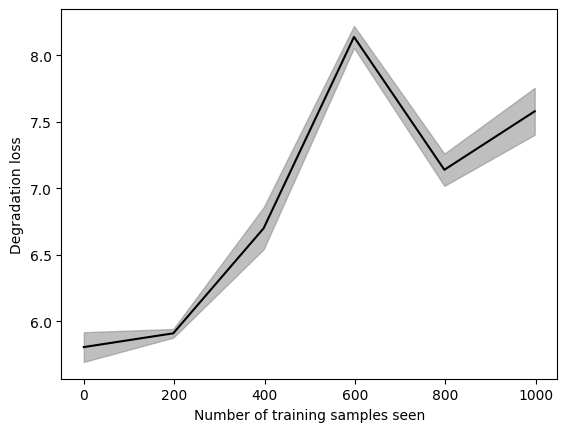

In [12]:
plt.fill_between(degrad_loss_df["samples"], degrad_loss_df["degrad_loss"] - degrad_loss_df["std"],
                  degrad_loss_df["degrad_loss"] + degrad_loss_df["std"], alpha = 0.5, color = 'gray')
plt.plot(degrad_loss_df["samples"], degrad_loss_df["degrad_loss"], color = 'black')
# 
plt.xlabel('Number of training samples seen')
plt.ylabel('Degradation loss')

# 3) Training loss plot

Text(0, 0.5, 'Training loss')

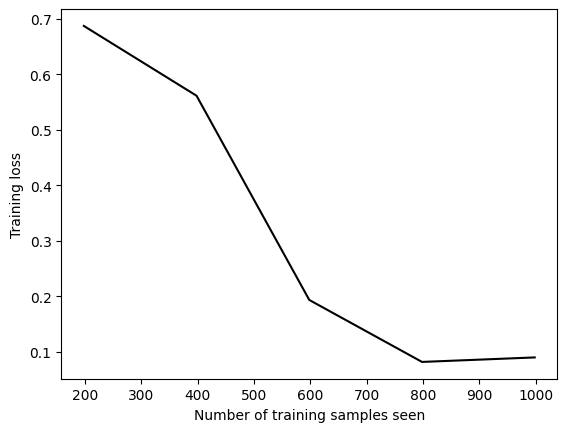

In [15]:
plt.plot(training_loss_df["samples"], training_loss_df["loss"], color = 'black')
# 
plt.xlabel('Number of training samples seen')
plt.ylabel('Training loss')

# 4) Heatmap crossmodel plot